In [25]:
library('igraph')
library('Matrix')
library('pracma')

In [26]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Transition Matrix for an Undirected Network


8 x 8 sparse Matrix of class "dgCMatrix"
                                                                  
[1,] .    1.0000000 .         .         . .         .    .        
[2,] 0.25 .         0.2500000 0.2500000 . 0.2500000 .    .        
[3,] .    0.5000000 .         .         . .         .    0.5000000
[4,] .    0.2500000 .         .         . 0.2500000 0.25 0.2500000
[5,] .    .         .         .         1 .         .    .        
[6,] .    0.3333333 .         0.3333333 . .         .    0.3333333
[7,] .    .         .         1.0000000 . .         .    .        
[8,] .    .         0.3333333 0.3333333 . 0.3333333 .    .        


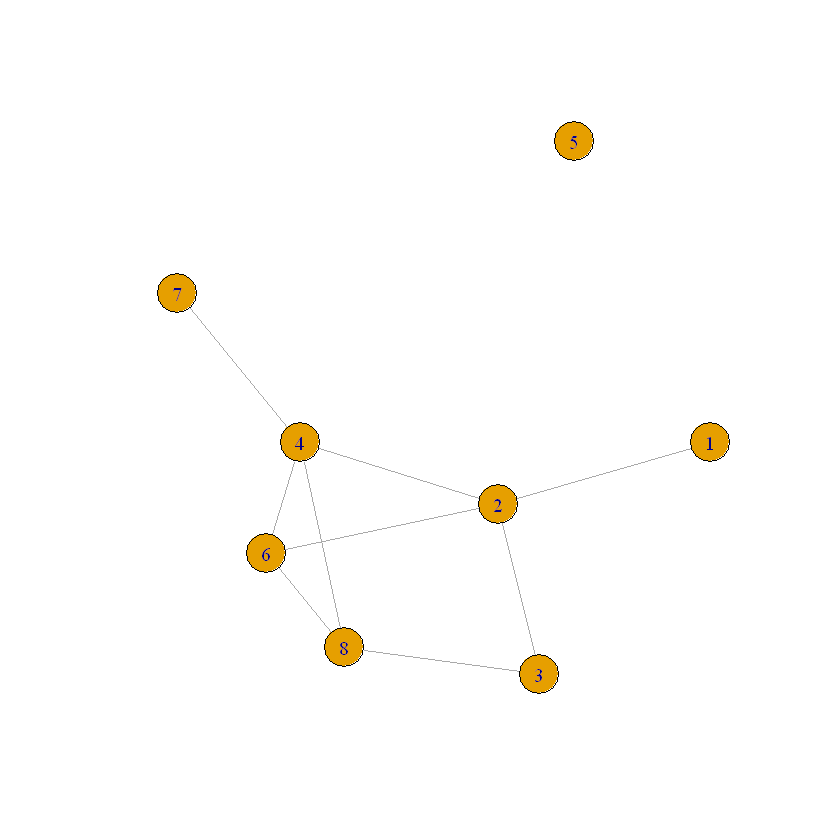

In [27]:
set.seed(0)
g = random.graph.game(8, 0.3)
plot(g)
print(create_transition_matrix(g))

### Transition Matrix for a Directed Network

8 x 8 sparse Matrix of class "dgCMatrix"
                                                                    
[1,] .    .         .    0.5000000 0.5000000 .         .         .  
[2,] 0.20 .         .    .         0.2000000 0.2000000 0.2000000 0.2
[3,] .    0.3333333 .    0.3333333 .         0.3333333 .         .  
[4,] 0.25 .         0.25 .         0.2500000 .         0.2500000 .  
[5,] .    0.5000000 .    .         .         .         .         0.5
[6,] .    0.3333333 .    .         0.3333333 .         0.3333333 .  
[7,] .    .         .    .         .         .         1.0000000 .  
[8,] .    0.2500000 0.25 .         0.2500000 .         0.2500000 .  


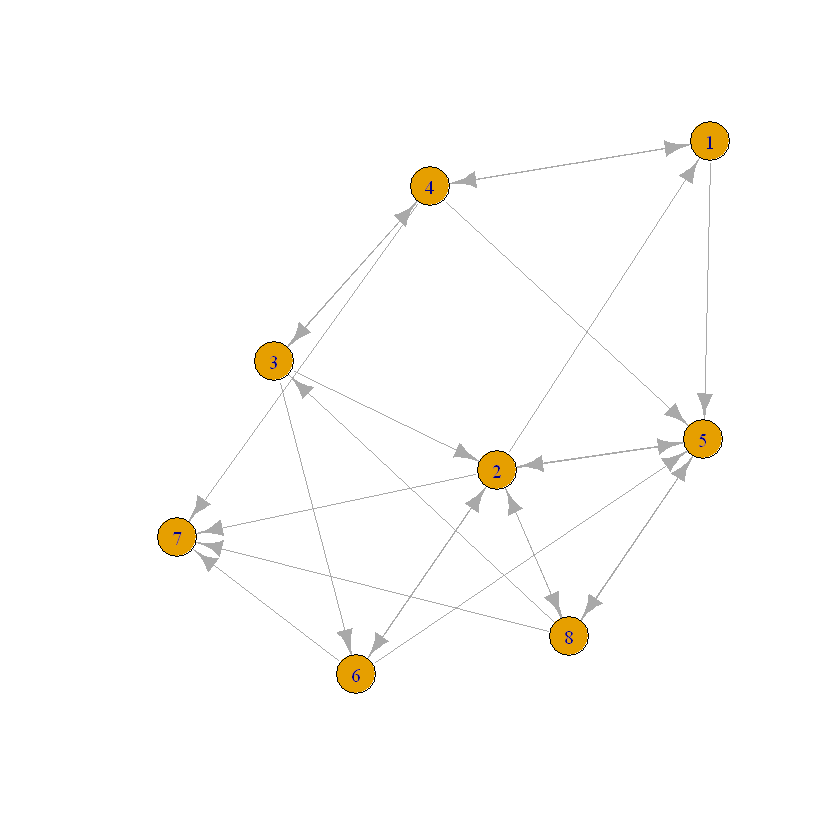

In [28]:
set.seed(1)
g = random.graph.game(8, 0.4, directed = T)
plot(g)
print(create_transition_matrix(g))

In [107]:
random_walk = function (g, num_steps, start_node, teleportation = 0.0, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    alist = c()    
    v = start_node
#     telecount = 0
    for(i in 1:num_steps){

#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        if (teleportation > 0.0 && sample(0:100) <= teleportation*100){
            v <- sample(1:vcount(g), 1)
#             telecount = telecount + 1
        }else {
        v <- sample(1:vcount(g), 1, prob = PMF)  
        }
        alist = append(alist, v)
    }
#     print(telecount)
    return(alist)
}

In [108]:
set.seed(1)
v_last = random_walk(g, 15, 1)

In [109]:
graph_1 <- sample_pa(n=1000, m=4, directed=T)
graph_2 <- sample_pa(n=1000, m=4, directed=T)
print(graph_1)


IGRAPH daef4f9 D--- 1000 3990 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from daef4f9:
 [1]  2-> 1  3-> 1  3-> 2  4-> 1  4-> 2  4-> 3  5-> 1  5-> 2  5-> 3  5-> 4
[11]  6-> 2  6-> 3  6-> 5  6-> 1  7-> 4  7-> 5  7-> 1  7-> 3  8-> 1  8-> 2
[21]  8-> 4  8-> 3  9-> 2  9-> 5  9-> 1  9-> 4 10-> 3 10-> 2 10-> 1 10-> 7
[31] 11-> 4 11-> 5 11-> 1 11-> 6 12-> 2 12-> 6 12-> 4 12-> 5 13-> 4 13-> 3
[41] 13-> 6 13-> 1 14-> 3 14-> 5 14-> 4 14-> 2 15-> 7 15-> 3 15-> 1 15-> 2
[51] 16-> 1 16-> 3 16-> 5 16-> 6 17-> 3 17->11 17-> 2 17-> 4 18-> 2 18-> 5
[61] 18-> 3 18-> 4 19-> 6 19-> 1 19->11 19-> 3 20-> 8 20-> 3 20-> 2 20-> 5
+ ... omitted several edges


In [110]:

merged_graph = add_edges(graph_1, t(as_edgelist(permute(graph_2, sample(vcount(graph_2))))), attr = list())


In [117]:

z = random_walk(merged_graph, 1000, sample( 1:vcount(merged_graph),1))
i = 0
while(i < 100) {
    z = append(z, random_walk(merged_graph, 1000, sample( 1:vcount(merged_graph),1)))
    i<-i+1 } 

In [118]:
degree(merged_graph, 3)

[1] 258

[1] 1

Call:
lm(formula = probability ~ deg)

Coefficients:
(Intercept)          deg  
  6.682e-05    1.189e-04  



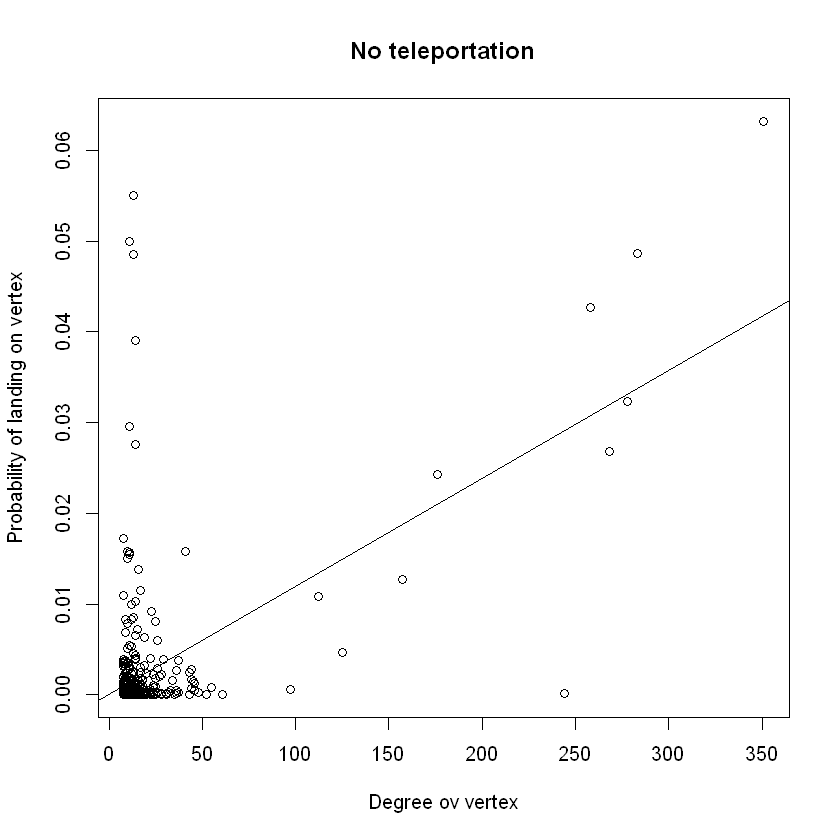

In [124]:
hello = as.data.frame(table(z))
summs = sum(hello['Freq'])
# print(hello)
probability = c()
deg= c()
print(length(hello['z']))
for(i in 1:nrow(hello['z'])){

        probability = append(probability, hello[i,'Freq']/summs )
        deg = append(deg ,degree(merged_graph, hello[i,'z']))
    }
# print(lengths(hello['z']))
# print(lengths(probability))
# print(probability)
# print(hello['z'])

plot(deg,probability, main="No teleportation", xlab="Degree ov vertex", ylab="Probability of landing on vertex")
abline(lm(probability ~ deg ))
print(lm(probability ~ deg ))
# print(a)

In [114]:
print(hello[3 ,'Freq'])


[1] 2099


In [115]:
zz = random_walk(merged_graph,500, sample(1:vcount(merged_graph),1),0.15)
i = 0
while(i < 100) {
    zz = append(zz, random_walk(merged_graph,500, sample(1:vcount(merged_graph),1),0.15))
    i<-i+1 } 

[1] 1

Call:
lm(formula = probability ~ deg)

Coefficients:
(Intercept)          deg  
 -4.706e-04    9.217e-05  



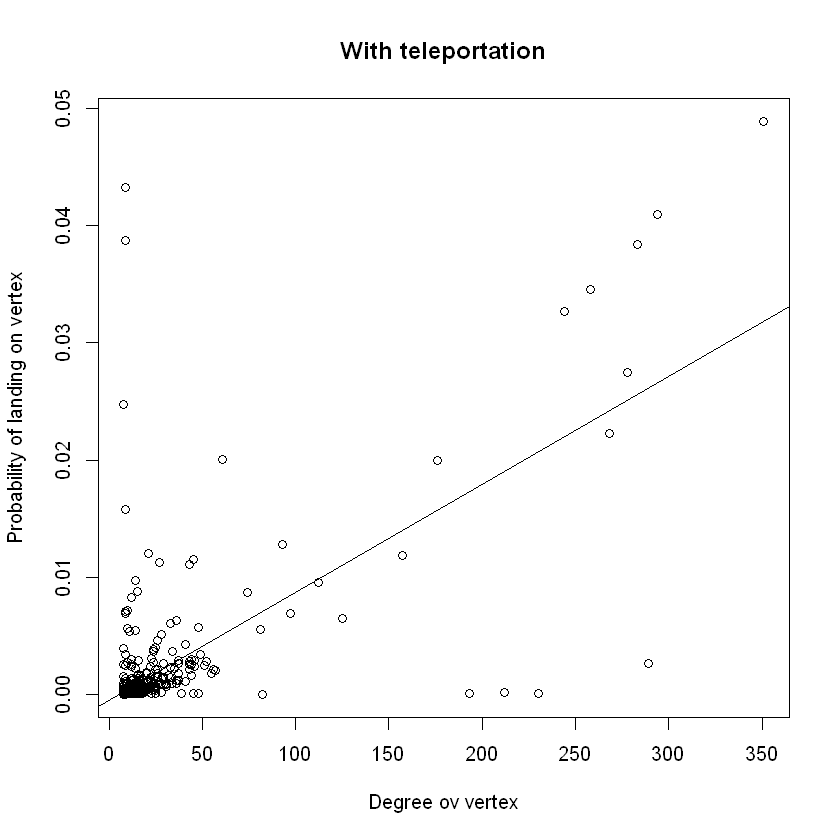

In [128]:
hello = as.data.frame(table(zz))
# print(hello)
summs = sum(hello['Freq'])

probability = c()
deg= c()
print(length(hello['zz']))
for(i in 1:nrow(hello['zz'])){

        probability = append(probability, hello[i,'Freq']/summs )
        deg = append(deg ,degree(merged_graph, hello[i,'zz']))
    }
# print(lengths(hello['z']))
# print(lengths(probability))
# print(probability)
# print(hello['z'])

plot(deg,probability, main="With teleportation", xlab="Degree of vertex", ylab="Probability of landing on vertex")
abline(lm(probability ~ deg ))
print(lm(probability ~ deg ))

# print(a)

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet
